In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
df = pd.read_csv("C:\\Users\\janek\\Downloads\\Telco Customer Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for x in df.columns:
    print(x,len(df[x].unique()))

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [8]:
df['OnlineBackup'].unique(), df['MultipleLines'].unique(), df['InternetService'].unique(), df['PaymentMethod'].unique(),
#df['OnlineBackup'].unique(), df['PaymentMethod'].unique(), df['PaymentMethod'].unique()

(array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No phone service', 'No', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object))

In [9]:
df['internet_service'] = 1 
df['internet_service'] = df.apply(lambda row: 0 if 'No internet service' in row.values else 1, axis=1)

In [10]:
df['phone_service'] = 1
df['phone_service'] = df.apply(lambda row: 0 if 'No phone service' in row.values else 1, axis=1)

In [11]:
df['internet_service'].unique()

array([1, 0], dtype=int64)

In [12]:
df['MonthlyCharges'].min(), df['MonthlyCharges'].max(), df['TotalCharges'].max()

(18.25, 118.75, '999.9')

In [13]:
natc = df['TotalCharges'].min()

In [14]:
natc

' '

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace(natc, 0)

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [17]:
df['TotalCharges'].min()

0.0

In [18]:
df['months_as_customer'] = (df['TotalCharges']/df['MonthlyCharges']).round().astype(int) 

In [19]:
df = df[df['months_as_customer']!=0] 

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,internet_service,phone_service,months_as_customer
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.783845,0.903299,32.418658
std,0.368844,24.545260,30.085974,2266.771362,0.411650,0.295571,24.582665
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,35.587500,401.450000,1.000000,1.000000,9.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,1.000000,29.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,55.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,79.000000


In [21]:
df.drop('customerID',axis=1,inplace=True)

C:\Users\janek\AppData\Local\Temp\ipykernel_2780\214849284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('customerID',axis=1,inplace=True)


In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet_service,phone_service,months_as_customer
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1,1,33
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,44
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1,1,23
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1,1,71
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0,12
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,1,4


In [23]:
lab_enc_col = ['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [24]:
le = LabelEncoder() 

In [25]:
for col in lab_enc_col:
    df[col] = le.fit_transform(df[col])

C:\Users\janek\AppData\Local\Temp\ipykernel_2780\2826515559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [26]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [27]:
# le = {}
# for col in df.columns:
#     if df[col].dtype == 'object':
#         le[col] = LabelEncoder()
#         df[col] = le[col].fit_transform(df[col])

In [28]:
# for col, encoder in le.items():
#     print(col, encoder.classes_)

In [29]:
#sns.pairplot(df, hue="Churn")

In [30]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
rf_model = RandomForestClassifier(random_state=42)
sfm = SelectFromModel(rf_model, threshold='mean')
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='mean')

In [35]:
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [36]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

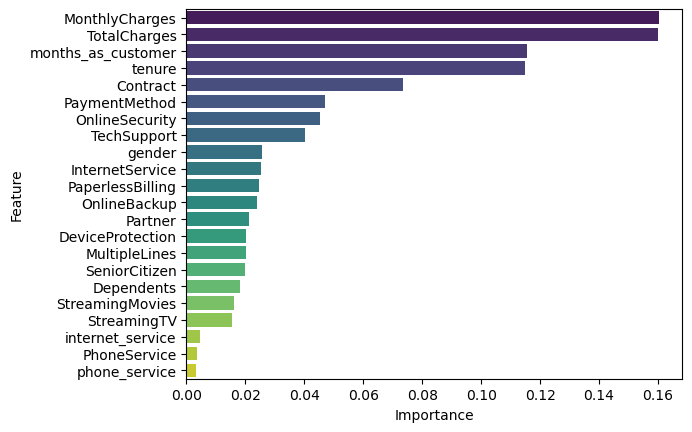

In [37]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis') 

In [38]:
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [39]:
selected_features = X.columns[sfm.get_support()]

In [40]:
selected_features

Index(['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'months_as_customer'],
      dtype='object')

In [41]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier(random_state=42)
}

In [42]:
best_model = None
best_score = 0

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    
    print(f"{model_name} - Acc: {mean_score}")
    
    if mean_score > best_score:
        best_score = mean_score
        best_model = model


SVM - Acc: 0.7342544674177707
Logistic Regression - Acc: 0.7866743015145887


C:\Users\janek\Downloads\jupiter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janek\Downloads\jupiter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

XGBoost - Acc: 0.7854541702777433
Neural Network - Acc: 0.7519470925673725


In [43]:
best_model.fit(X_train_selected, y_train)

C:\Users\janek\Downloads\jupiter\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# acc
test_accuracy = best_model.score(X_test_selected, y_test)
print(f"Test Accuracy for the Best Model: {test_accuracy}")

Test Accuracy for the Best Model: 0.7734597156398104


In [45]:
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

In [50]:
y_pred_proba

array([0.00284626, 0.19718546, 0.66606166, ..., 0.00515731, 0.4680297 ,
       0.12829561])

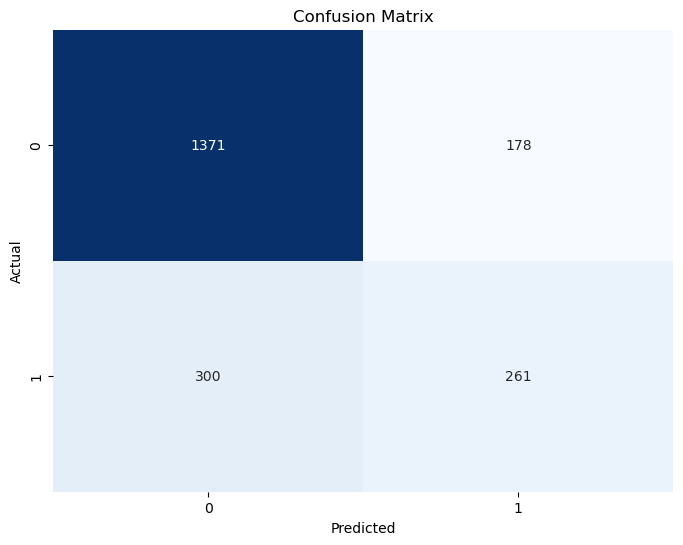

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7735
Precision: 0.5945
Recall: 0.4652
F1 Score: 0.5220


# Results

Based on the results of the algorithm chosen by way of 'competition', i.e. logistic regression, the variable 'Churn' can be predicted rather moderately. Accuracy is around 77%, which is a rather poor result and in a real company such a model would not be allowed to be used. Precision and Recall nevertheless indicate a significant number of errors made by the model, while the F1 score is at an optimal level. Note that I have not applied hyperparameter tuning here, which could have done a lot of good to the model's performance. There is also a chance that a different algorithm would have worked better, or other features would have given a better result. It's all a matter of testing - trial and error :) Of the things I would still check - I would try to use One Hot Encoding instead of Label Encoding. I know from more experienced friends that the former option often works better.n)